This notebook helps you visualize the correlation matrix between the various ensemble averaged measures of the subsystems on the qubit network. After extracting the correlation matrix, the notebook helps you visualize the regression and relationships between the correlated variables. 

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

In [7]:
therm_12='RunStats_12_Q_therm_CSV.csv'
pure_12='RunStats_12_Q_pure_CSV.csv'
inhomov2_12='RunStats_12_Q_inhomov2_CSV.csv'
inhomov1_12='RunStats_12_Q_inhomov1_CSV.csv'
df = pd.read_csv('RunStats.csv', index_col=False)
df_therm_12Q = df.iloc[0:10,0:13]
df_pure_12Q = df.iloc[30:40,0:13]
df_inhomov1_12Q = df.iloc[10:20,0:13]
df_inhomov2_12Q = df.iloc[20:30,0:13]
df_10Q=pd.read_csv("RunStatsFixed.csv",index_col=False)
df_10Q
df_therm_10Q = df_10Q.iloc[30:40,0:13]
df_pure_10Q = df_10Q.iloc[0:10,0:13]
df_inhomov1_10Q = df_10Q.iloc[10:20,0:13]
df_inhomov2_10Q = df_10Q.iloc[20:30,0:13]
df_therm_12Q

/var/folders/58/gxcqk5bd4055b6n0b6yszvlw0000gn/T/ipykernel_64598/269335712.py:5: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv('RunStats.csv', index_col=False)


,runtype_name,tz_mean,tz_std,MI_mean,MI_std,disp_mean,disp_std,clust_mean,clust_std,DeltaW_mean,DeltaW_std,DeltaW_persist_stat,DeltaW_persist_std
0,R1Q8C2ICtherm,0.03242,0.000167,0.067912,0.005795,0.123111,0.009782,0.000541,0.000090,0.000878,0.000121,309.86,54.654006
1,R1Q8C4ICtherm,0.03242,0.000076,0.050855,0.001378,0.119984,0.009096,0.000422,0.000036,0.000330,0.000029,431.01,29.133656
2,R2Q8C2ICtherm,0.03242,0.001116,0.094955,0.030705,0.264804,0.049717,0.001520,0.001076,0.004867,0.002513,674.03,301.627898
3,R2Q8C4ICtherm,0.03242,0.000215,0.049027,0.003404,0.209272,0.049643,0.000491,0.000138,0.002921,0.000438,323.72,256.779286
4,R5Q8C2ICtherm,0.03242,0.000915,0.091484,0.029517,0.268929,0.040096,0.001426,0.000770,0.005565,0.002391,747.01,269.157667
5,R5Q8C4ICtherm,0.03242,0.000197,0.050512,0.002995,0.268929,0.040096,0.000505,0.000183,0.003723,0.000382,447.03,224.536209
6,R4Q8C2ICtherm,0.03242,0.001100,0.109802,0.030416,0.205200,0.032817,0.001718,0.000854,0.002764,0.001754,527.10,261.259086
7,R43Q8C4ICtherm,0.03242,0.000178,0.051612,0.003663,0.166985,0.034783,0.000625,0.000209,0.000635,0.000171,344.75,100.330292
8,R4Q8C2ICtherm,0.03242,0.001680,0.116770,0.029048,0.228065,0.050302,0.001718,0.000808,0.003795,0.002900,638.59,273.791457
9,R4Q8C4ICtherm,0.03242,0.000122,0.052146,0.006381,0.118978,0.018444,0.000625,0.000153,0.003795,0.002900,330.97,50.673949


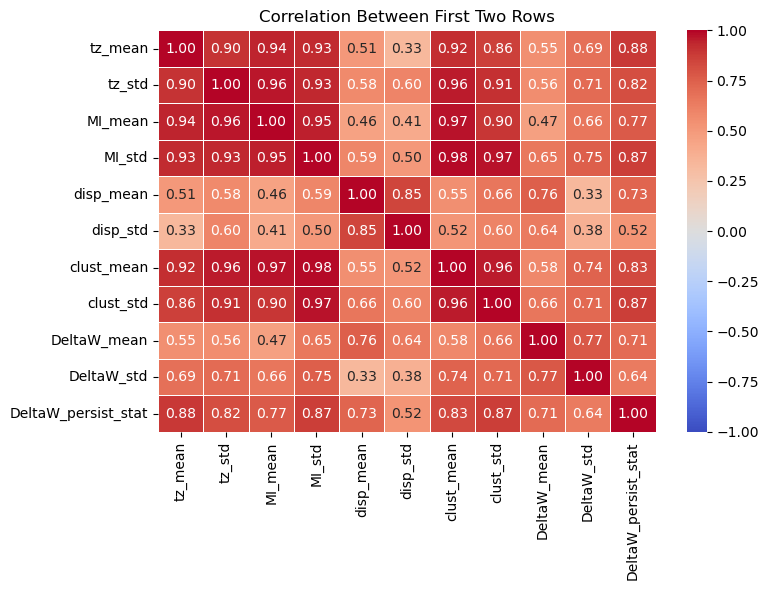

In [8]:
df_therm_12Q.iloc[:,1:12]
df_inhomov1_12Q.iloc[:,1:12]
df_inhomov2_12Q.iloc[:,1:12]
df_pure_12Q.iloc[:,1:12]


correlation_therm_12Q = df_therm_12Q.iloc[:,1:12].corr()
correlation_inhomov1_12Q = df_inhomov1_12Q.iloc[:,1:12].corr()
correlation_inhomov2_12Q = df_inhomov2_12Q.iloc[:,1:12].corr()
correlation_pure_12Q = df_pure_12Q.iloc[:,1:12].corr()

df_therm_10Q.iloc[:,1:12]
df_inhomov1_10Q.iloc[:,1:12]
df_inhomov2_10Q.iloc[:,1:12]
df_pure_10Q.iloc[:,1:12]


correlation_therm_10Q = df_therm_10Q.iloc[:,1:12].corr()
correlation_inhomov1_10Q = df_inhomov1_10Q.iloc[:,1:12].corr()
correlation_inhomov2_10Q = df_inhomov2_10Q.iloc[:,1:12].corr()
correlation_pure_10Q = df_pure_10Q.iloc[:,1:12].corr()

# Create a heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_therm_12Q, annot=True, cmap='coolwarm', 
            vmin=-1, vmax=1, linewidths=0.5, fmt=".2f")
plt.title('Correlation Between First Two Rows')
plt.tight_layout()
plt.show()

Below is the code to visualize the correlation matrix per rule for a gien inital state. 

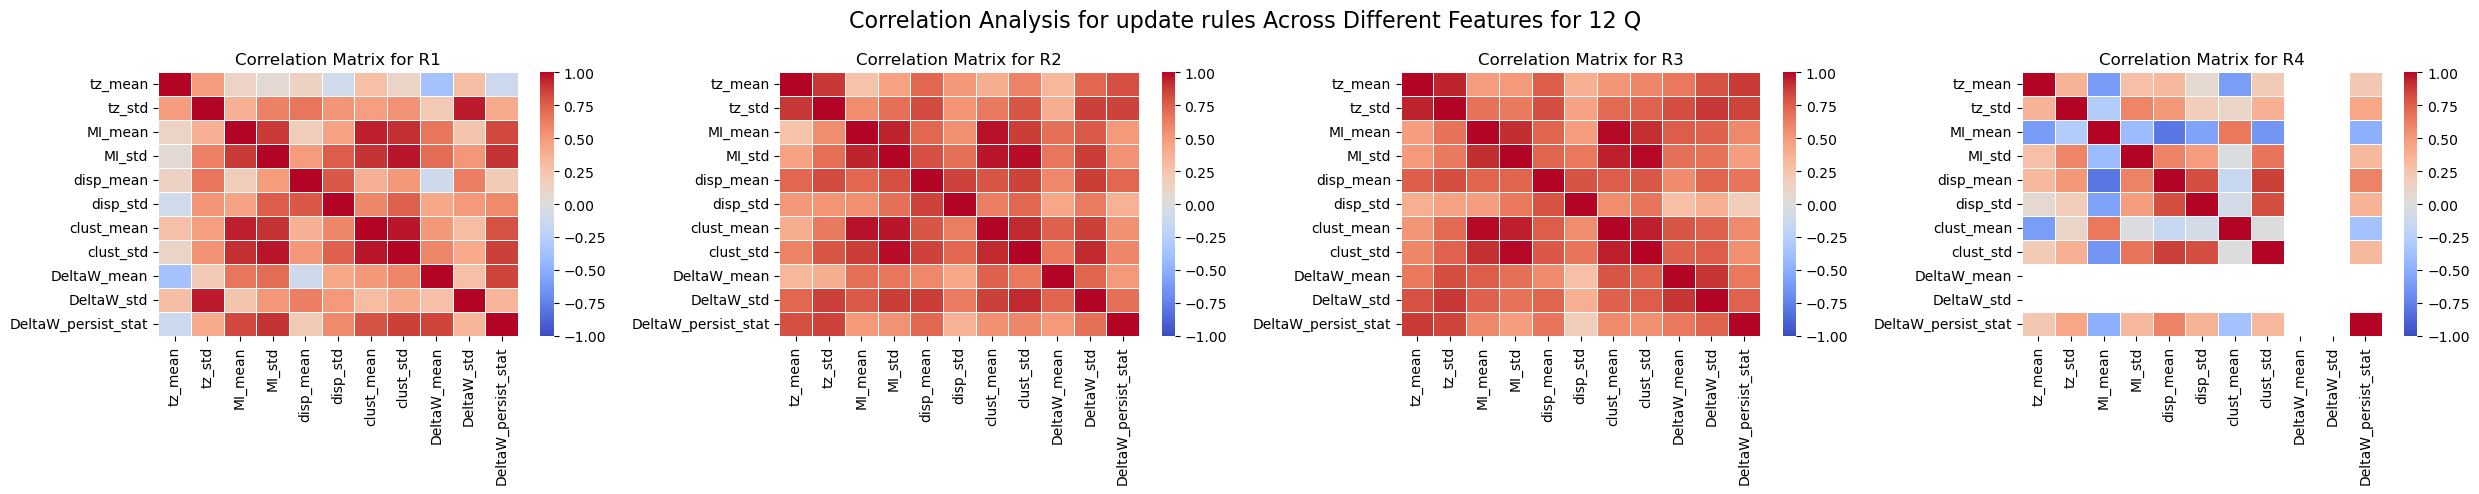

In [9]:
corr_mats_10=[correlation_therm_10Q,correlation_inhomov1_10Q,correlation_inhomov2_10Q,correlation_pure_10Q]

titles=["R1","R2","R3","R4","R5"]
# Create a figure with 5 subplots in one row
fig, axs = plt.subplots(1,4, figsize=(25, 5))
axs = axs.flatten()
fig.suptitle('Correlation Analysis for update rules Across Different Features for 12 Q', fontsize=16)
# Loop through each subplot and plot the corresponding correlation matrix
for i in range(len(corr_mats_10)):
    # Assuming you have 5 correlation matrices named corr1, corr2, etc.
    # Replace this with your actual correlation matrices
    correlation = corr_mats_10[i]  # Or access them however they're stored
    
    # Plot on the corresponding subplot
    #sns.heatmap(correlation, annot=True, cmap='coolwarm',
     #           vmin=-1, vmax=1, linewidths=0.5, fmt=".2f", ax=axs[i])
    sns.heatmap(correlation, annot=False, cmap='coolwarm',
                vmin=-1, vmax=1, linewidths=0.5, ax=axs[i])
    axs[i].set_title(f'Correlation Matrix for {titles[i]}')

plt.tight_layout()
plt.show()

NameError: name 'corr_mats' is not defined

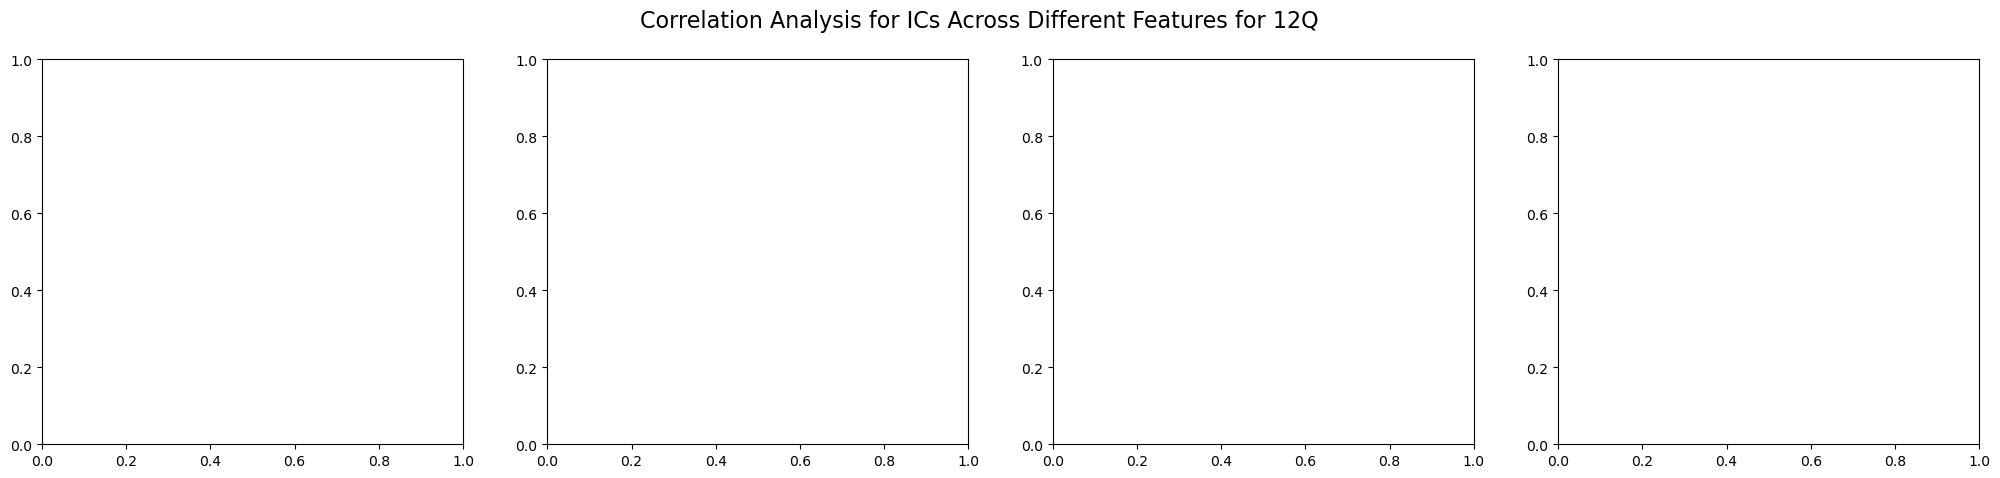

In [10]:
#Correlation matrices across ICs.
titles=["IC-therm","IC-pure","IC-v1","IC-v2"]
# Create a figure with 5 subplots in one row
fig, axs = plt.subplots(1, 4, figsize=(25, 5))
axs = axs.flatten()
fig.suptitle('Correlation Analysis for ICs Across Different Features for 12Q', fontsize=16)
# Loop through each subplot and plot the corresponding correlation matrix
for i in range(len(corr_mats)):
    # Assuming you have 5 correlation matrices named corr1, corr2, etc.
    # Replace this with your actual correlation matrices
    correlation = corr_mats[i]  # Or access them however they're stored
    
    # Plot on the corresponding subplot
    #sns.heatmap(correlation, annot=True, cmap='coolwarm',
     #           vmin=-1, vmax=1, linewidths=0.5, fmt=".2f", ax=axs[i])
    sns.heatmap(correlation, annot=False, cmap='coolwarm',
                vmin=-1, vmax=1, linewidths=0.5, ax=axs[i])
    axs[i].set_title(f'Correlation Matrix for {titles[i]}')
    display(correlation)
plt.tight_layout()
plt.show()

If your data is stored in the order of C2, C4 per rule then this code can help extract all the C2 data and all the C4 data seperately

In [12]:
def process_dataframe(df):
    """
    Process a dataframe by:
    1. Subtracting first row values from rows 2, 4, 6, 8 (except columns 0 and 13)
    2. Subtracting second row values from rows 3, 5, 7, 9 (except columns 0 and 13)
    3. Returning a new dataframe with rows in the order: 2, 6, 8, 4, 3, 7, 9, 5
    4. Setting any very small values (e-10 or smaller) to 0
    
    Parameters:
    df (pandas.DataFrame): The input dataframe with at least 10 rows
    
    Returns:
    pandas.DataFrame: The processed dataframe with 8 rows
    """
    
    # Check if dataframe has enough rows
    if len(df) < 10:
        raise ValueError("Input dataframe must have at least 10 rows")
    
    # Reset index to ensure we have a clean 0-based index
    df_reset = df.reset_index(drop=True)
    
    # Create a copy of the dataframe with numeric values, except for columns 0 and 13
    numeric_df = df_reset.copy()
    for col in numeric_df.columns:
        col_idx = numeric_df.columns.get_loc(col)
        if col_idx != 0 and col_idx != 13:
            numeric_df[col] = pd.to_numeric(numeric_df[col], errors='coerce')
    
    # Perform the subtractions
    subtracted_rows = {}
    
    # Rows to process
    rows_to_subtract_from_0 = [2, 4, 6, 8]
    rows_to_subtract_from_1 = [3, 5, 7, 9]
    
    # Subtract row 0 values from rows 2, 4, 6, 8 (except columns 0 and 13)
    for row in rows_to_subtract_from_0:
        # Create a new row by copying the original
        subtracted_rows[row] = numeric_df.loc[row].copy()
        
        # Subtract for all columns except 0 and 13
        for col in numeric_df.columns:
            col_idx = numeric_df.columns.get_loc(col)
            if col_idx != 0 and col_idx != 13:
                subtracted_rows[row][col] = (numeric_df.loc[row, col]-numeric_df.loc[0, col])/ numeric_df.loc[0, col] #divide instead of subtract 
    
    # Subtract row 1 values from rows 3, 5, 7, 9 (except columns 0 and 13)
    for row in rows_to_subtract_from_1:
        # Create a new row by copying the original
        subtracted_rows[row] = numeric_df.loc[row].copy()
        
        # Subtract for all columns except 0 and 13
        for col in numeric_df.columns:
            col_idx = numeric_df.columns.get_loc(col)
            if col_idx != 0 and col_idx != 13:
                subtracted_rows[row][col] = numeric_df.loc[row, col]/ numeric_df.loc[1, col]
    
    # Create new dataframe with the specific row order: 2,6,8,4,3,7,9,5
    new_order = [2, 6, 8, 4, 3, 7, 9, 5]
    new_rows = [subtracted_rows[i] for i in new_order]
    new_df = pd.DataFrame(new_rows)
    
    # Reset the index to have consecutive row numbers
    new_df = new_df.reset_index(drop=True)
    
    # Set any values with e-10 or smaller to 0
    for col in new_df.columns:
        col_idx = new_df.columns.get_loc(col)
        if col_idx != 0 and col_idx != 13:  # Skip columns 0 and 13
            new_df[col] = new_df[col].apply(
                lambda x: 0 if isinstance(x, (int, float)) and abs(x) < 1e-8 else x
            )
    
    return new_df

Given a dataframe, the following code helps find which features have strongest relationship with a given target variable. 

In [51]:
def find_best_regression_models(df_therm, df_inhomov1, df_inhomov2, target_col, feature_cols, 
                               max_features=None, top_n=5, min_r2=0.3):
    """
    Find the best regression models by testing different combinations of features.
    
    Parameters:
    df_therm, df_inhomov1, df_inhomov2: Input dataframes
    target_col: Column name of the target variable
    feature_cols: List of column names for potential features/independent variables
    max_features: Maximum number of features to include in a model (default: len(feature_cols))
    top_n: Number of top models to return (default: 5)
    min_r2: Minimum R-squared value to consider a model (default: 0.3)
    
    Returns:
    list: Top N models with their statistics
    """
    import pandas as pd
    import numpy as np
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score
    import statsmodels.api as sm
    from itertools import combinations
    
    # Process each dataframe
    try:
        proc_df_therm = process_dataframe(df_therm)
        proc_df_inhomov1 = process_dataframe(df_inhomov1)
        proc_df_inhomov2 = process_dataframe(df_inhomov2)
    except Exception as e:
        raise ValueError(f"Error processing dataframes: {str(e)}")
    
    # Combine the processed dataframes
    combined_df = pd.concat([proc_df_therm, proc_df_inhomov1, proc_df_inhomov2], ignore_index=True)
    
    # Convert all relevant columns to numeric
    for col in feature_cols + [target_col]:
        combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce')
    
    # Drop rows with missing values
    combined_df = combined_df.dropna(subset=feature_cols + [target_col])
    
    # Set maximum number of features if not specified
    if max_features is None:
        max_features = len(feature_cols)
    else:
        max_features = min(max_features, len(feature_cols))
    
    # Store results
    model_results = []
    
    # Test all combinations from 1 to max_features
    for n_features in range(1, max_features + 1):
        for feature_subset in combinations(feature_cols, n_features):
            feature_subset = list(feature_subset)
            
            # Extract features and target
            X = combined_df[feature_subset]
            y = combined_df[target_col]
            
            # Check if we have enough data points
            if len(X) <= len(feature_subset) + 1:
                continue
            
            # Add constant for statsmodels
            X_with_const = sm.add_constant(X)
            
            # Fit statsmodels OLS for detailed statistics
            try:
                sm_model = sm.OLS(y, X_with_const).fit()
                
                # Check for multicollinearity (VIF)
                has_multicollinearity = False
                if len(feature_subset) > 1:
                    from statsmodels.stats.outliers_influence import variance_inflation_factor
                    vif_data = pd.DataFrame()
                    vif_data["feature"] = X.columns
                    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
                    has_multicollinearity = (vif_data['VIF'] > 10).any()
                
                # Extract p-values for features
                p_values = sm_model.pvalues[1:].tolist()  # Skip constant
                max_p_value = max(p_values)
                avg_p_value = sum(p_values) / len(p_values)
                
                # Calculate scikit-learn for R2
                sk_model = LinearRegression()
                sk_model.fit(X, y)
                y_pred = sk_model.predict(X)
                r2 = r2_score(y, y_pred)
                
                # Skip models below minimum R2
                if r2 < min_r2:
                    continue
                
                # Store model information
                model_info = {
                    'features': feature_subset,
                    'n_features': len(feature_subset),
                    'r2': r2,
                    'adjusted_r2': sm_model.rsquared_adj,
                    'aic': sm_model.aic,
                    'bic': sm_model.bic,
                    'max_p_value': max_p_value,
                    'avg_p_value': avg_p_value,
                    'f_pvalue': sm_model.f_pvalue,
                    'has_multicollinearity': has_multicollinearity,
                    'coefficients': {col: coef for col, coef in zip(feature_subset, sk_model.coef_)},
                    'p_values': {col: p for col, p in zip(feature_subset, p_values)},
                    'intercept': sk_model.intercept_,
                    'formula': f"{target_col} = {sk_model.intercept_:.4f} + " + 
                              " + ".join([f"{coef:.4f}*{col}" for col, coef in zip(feature_subset, sk_model.coef_)])
                }
                
                model_results.append(model_info)
                
            except Exception as e:
                # Skip this combination if there's an error (e.g., perfect multicollinearity)
                continue
    
    # Sort results
    # First by max p-value (ascending), then by adjusted R2 (descending)
    sorted_models = sorted(model_results, key=lambda x: (x['max_p_value'], -x['adjusted_r2']))
    
    # Return top N models
    return sorted_models[:top_n]

def visualize_best_models(best_models, figsize=(12, 10)):
    """
    Visualize the best regression models with their statistics.
    
    Parameters:
    best_models: List of model dictionaries from find_best_regression_models
    figsize: Figure size tuple (optional)
    
    Returns:
    fig, axes: The created matplotlib figure and axes
    """
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    
    # Create figure with multiple subplots
    n_models = len(best_models)
    fig, axes = plt.subplots(n_models, 2, figsize=figsize)
    
    # Handle the case of a single model
    if n_models == 1:
        axes = np.array([axes])
    
    for i, model in enumerate(best_models):
        # Create dataframes for plotting
        feature_stats = pd.DataFrame({
            'Feature': list(model['p_values'].keys()),
            'Coefficient': [model['coefficients'][f] for f in model['p_values'].keys()],
            'P-value': list(model['p_values'].values())
        })
        
        # Sort by p-value (ascending)
        feature_stats = feature_stats.sort_values('P-value')
        
        # Plot coefficients
        ax1 = axes[i, 0]
        bars = ax1.barh(feature_stats['Feature'], feature_stats['Coefficient'])
        
        # Add coefficient values as text
        for j, bar in enumerate(bars):
            width = bar.get_width()
            label_x_pos = width * 1.05 if width >= 0 else width * 0.95
            ax1.text(label_x_pos, bar.get_y() + bar.get_height()/2, 
                    f'{width:.4f}', va='center')
        
        ax1.set_title(f"Model {i+1}: Coefficients")
        ax1.set_xlabel('Coefficient Value')
        ax1.grid(axis='x', linestyle='--', alpha=0.7)
        
        # Plot p-values
        ax2 = axes[i, 1]
        bars = ax2.barh(feature_stats['Feature'], feature_stats['P-value'])
        # Add p-value as text
        for j, bar in enumerate(bars):
            width = bar.get_width()
            ax2.text(width * 1.05, bar.get_y() + bar.get_height()/2, 
                    f'{width:.4f}', va='center')
        
        # Add significance threshold line
        ax2.axvline(x=0.05, color='red', linestyle='--', alpha=0.7)
        ax2.text(0.05, -0.5, 'p=0.05', color='red')
        
        ax2.set_title(f"Model {i+1}: P-values")
        ax2.set_xlabel('P-value (lower is better)')
        ax2.grid(axis='x', linestyle='--', alpha=0.7)
        
        # Add model summary as text
        plt.figtext(0.5, 1.0 - i * (1.0/n_models) - 0.06, 
                   f"Model {i+1}: {', '.join(model['features'])}\n" +
                   f"R² = {model['r2']:.4f}, Adj. R² = {model['adjusted_r2']:.4f}, " +
                   f"AIC = {model['aic']:.2f}, BIC = {model['bic']:.2f}", 
                   ha='center', fontsize=10, 
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9 - 0.04 * n_models)
    
    return fig, axes

Found 10 models meeting criteria.

Model 1:
Features: ['disp_mean', 'disp_std']
Formula: DeltaW_mean = 0.0041 + 0.0274*disp_mean + -0.1278*disp_std
R²: 0.4171, Adjusted R²: 0.3616
Max p-value: 0.0019, Avg p-value: 0.0018
AIC: -259.93, BIC: -256.40
Feature p-values:
  disp_mean: 0.0019
  disp_std: 0.0016

Model 2:
Features: ['tz_std']
Formula: DeltaW_mean = 0.0020 + 0.7240*tz_std
R²: 0.3058, Adjusted R²: 0.2742
Max p-value: 0.0051, Avg p-value: 0.0051
AIC: -257.74, BIC: -255.38
Feature p-values:
  tz_std: 0.0051

Model 3:
Features: ['tz_std', 'MI_mean', 'clust_mean']
Formula: DeltaW_mean = 0.0017 + 1.1180*tz_std + -0.0369*MI_mean + 1.7045*clust_mean
R²: 0.4237, Adjusted R²: 0.3373
Max p-value: 0.0973, Avg p-value: 0.0557
AIC: -258.21, BIC: -253.49
Feature p-values:
  tz_std: 0.0038
  MI_mean: 0.0973
  clust_mean: 0.0660

Model 4:
Features: ['tz_std', 'disp_mean', 'disp_std']
Formula: DeltaW_mean = 0.0032 + 0.4066*tz_std + 0.0214*disp_mean + -0.0946*disp_std
R²: 0.4883, Adjusted R²: 0.41

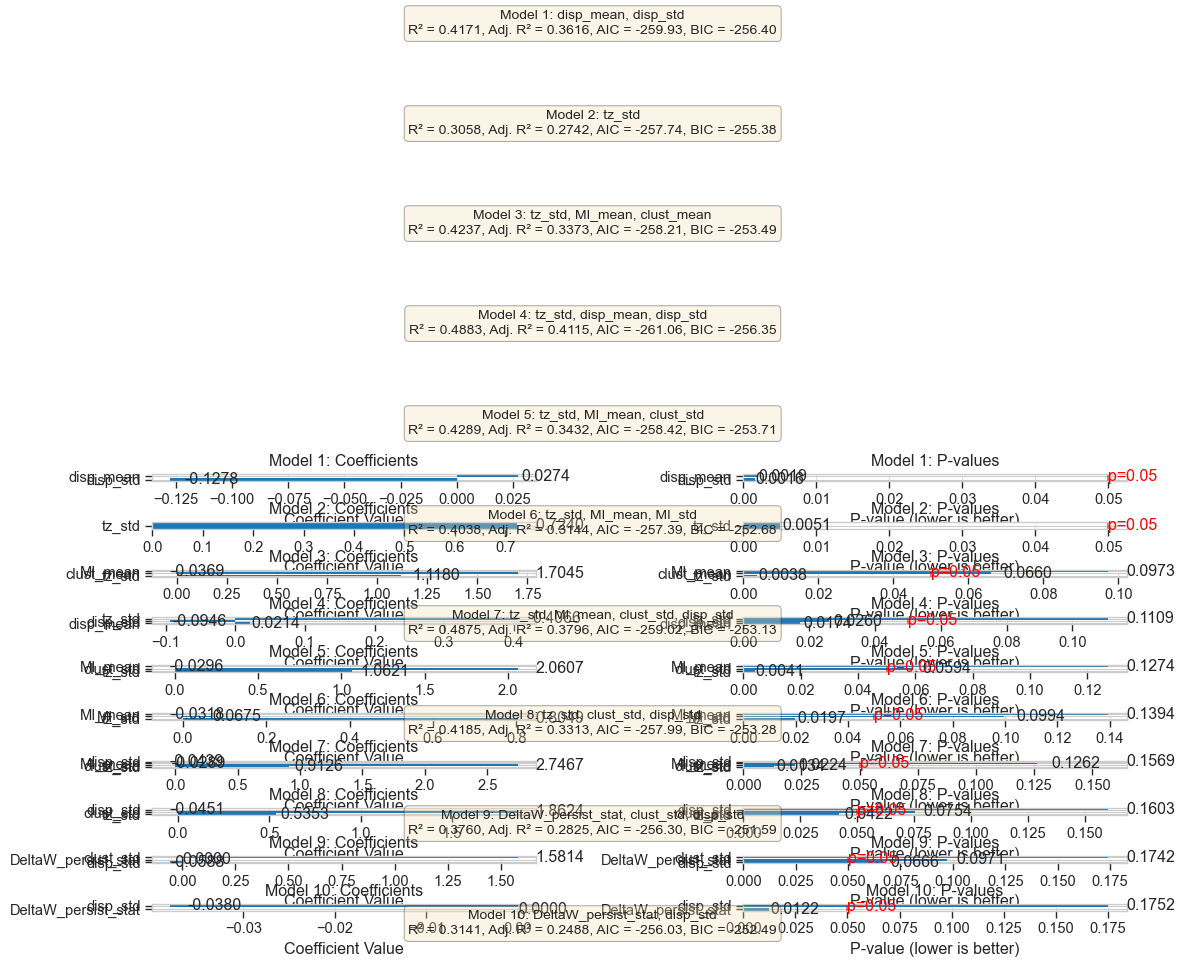

In [52]:
#An example code for how to find the variables for multivariate regression
# Define your target column and potential feature columns
target_column = 'DeltaW_mean'  # Your target variable
feature_columns = ['DeltaW_persist_stat', 'tz_std', 'MI_mean', 'MI_std', 'clust_mean', 'clust_std','disp_mean','disp_std']  # Your potential dependent variables

# Find the best regression models
best_models = find_best_regression_models(
    df_therm_12Q,
    df_inhomov1_12Q,
    df_inhomov2_12Q,
    target_col=target_column,
    feature_cols=feature_columns,
    max_features=4,  # Maximum number of features to include in a model
    top_n=10,         # Return the top 5 models
    min_r2=0.3       # Minimum R² to consider
)

# Print the results
print(f"Found {len(best_models)} models meeting criteria.")
for i, model in enumerate(best_models):
    print(f"\nModel {i+1}:")
    print(f"Features: {model['features']}")
    print(f"Formula: {model['formula']}")
    print(f"R²: {model['r2']:.4f}, Adjusted R²: {model['adjusted_r2']:.4f}")
    print(f"Max p-value: {model['max_p_value']:.4f}, Avg p-value: {model['avg_p_value']:.4f}")
    print(f"AIC: {model['aic']:.2f}, BIC: {model['bic']:.2f}")
    print("Feature p-values:")
    for feat, p_val in model['p_values'].items():
        print(f"  {feat}: {p_val:.4f}")
    if model['has_multicollinearity']:
        print("WARNING: This model may have multicollinearity issues")

# Visualize the results
fig, axes = visualize_best_models(best_models)
plt.show()

In [55]:
#Code to plot relationships once variables have been recognized.
def plot_multiple_scatter_plots(df_therm, df_inhomov1, df_inhomov2, 
                               x_cols, y_cols, x_titles, y_titles, titles=None, 
                               figsize=(20, 7), configs_to_plot=['C2', 'C4']):
    """
    Process dataframes and create 3 scatter plots in a row with legends below.
    
    Parameters:
    df_therm, df_inhomov1, df_inhomov2: Input dataframes
    x_cols: List of 3 column names for x-axis of each plot
    y_cols: List of 3 column names for y-axis of each plot
    x_titles: List of 3 x-axis labels
    y_titles: List of 3 y-axis labels
    titles: List of 3 titles (optional)
    figsize: Figure size tuple (optional)
    configs_to_plot: List of configurations to plot, e.g., ['C2'], ['C4'], or ['C2', 'C4']
    
    Returns:
    fig, axes: The created matplotlib figure and axes
    """
    import pandas as pd
    import matplotlib.pyplot as plt
    import matplotlib.lines as mlines
    import matplotlib.patches as mpatches
    from matplotlib.gridspec import GridSpec
    
    # Validate inputs
    if len(x_cols) == 3 or len(y_cols) == 3:
        if titles is None:
            titles = [f'{y_col} vs {x_col}' for x_col, y_col in zip(x_cols, y_cols)]
        elif len(titles) != 3:
            raise ValueError("If provided, titles must be a list of 3 strings")
        
        # Process each dataframe
        try:
            proc_df_therm = process_dataframe(df_therm)
            proc_df_inhomov1 = process_dataframe(df_inhomov1)
            proc_df_inhomov2 = process_dataframe(df_inhomov2)
        except Exception as e:
            raise ValueError(f"Error processing dataframes: {str(e)}")
        
        # Add the block identifier
        proc_df_therm['block'] = 'CS1'
        proc_df_inhomov1['block'] = 'CS2'
        proc_df_inhomov2['block'] = 'CS3'
        
        # Add config column and point names
        point_names = ['R2', 'R3', 'R4', 'R5']
        
        for df in [proc_df_therm, proc_df_inhomov1, proc_df_inhomov2]:
            df['config'] = ['C2', 'C2', 'C2', 'C2', 'C4', 'C4', 'C4', 'C4']
            df['point_idx'] = [0, 1, 2, 3, 0, 1, 2, 3]
            df['point_name'] = point_names * 2
        
        # Combine the processed dataframes
        combined_df = pd.concat([proc_df_therm, proc_df_inhomov1, proc_df_inhomov2], ignore_index=True)
        
        # Filter for requested configurations
        combined_df = combined_df[combined_df['config'].isin(configs_to_plot)]
        
        # Create single figure with GridSpec to organize subplots and legends
        fig = plt.figure(figsize=figsize)
        gs = GridSpec(2, 3, height_ratios=[5, 1])
        
        # Create axes for scatter plots in top row
        axes = [fig.add_subplot(gs[0, i]) for i in range(3)]
        
        # Create axes for legends in bottom row
        legend_ax = fig.add_subplot(gs[1, :])
        legend_ax.axis('off')
        
        # Define colors for each of the 4 points
        colors = {'R2': '#DC143C', 'R3': '#228B22', 'R4': '#FF8C00', 'R5': '#8A2BE2'}
        
        # Define markers for each block type
        block_markers = {'CS1': 'o', 'CS2': 'D', 'CS3': '^'}
        
        # Set alphas based on config
        alpha_values = {'C2': 0.7, 'C4': 0.3}
        
        # Plot each scatter plot
        for i, (x_col, y_col, title) in enumerate(zip(x_cols, y_cols, titles)):
            ax = axes[i]
            
            # Plot all data points for this subplot
            for _, row in combined_df.iterrows():
                ax.scatter(
                    row[x_col], 
                    row[y_col], 
                    color=colors[row['point_name']], 
                    marker=block_markers[row['block']], 
                    alpha=alpha_values[row['config']],
                    s=100  # Make points a bit larger
                )
            
            # Set labels and title for this subplot
            ax.set_xlabel(x_titles[i], fontsize=20)
            ax.set_ylabel(y_titles[i], fontsize=20)
            #ax.set_title(title)
            
            # Add grid
            ax.grid(True, linestyle='--', alpha=0.7)
        
        # Create custom legend elements
        
        # 1. Legend for point names (colors) - using lines instead of patches
        color_handles = [mlines.Line2D([], [], color=color, marker='None', linestyle='-',
                                  markersize=0, linewidth=2, label=name)
                        for name, color in colors.items()]
        
        # 2. Legend for block types (marker shapes)
        shape_handles = [mlines.Line2D([], [], color='black', marker=marker, linestyle='None',
                                      markersize=10, label=block)
                        for block, marker in block_markers.items()]
        
        # 3. Legend for configuration (alpha) - only show configs that are plotted
        config_handles = [mlines.Line2D([], [], color='black', marker='o', linestyle='None',
                                       markersize=10, alpha=alpha_values[config], label=config)
                          for config in configs_to_plot if config in alpha_values]
        
        # Add legends to the same figure
        # Create two separate axes for the legends
        legend_ax1 = plt.axes([0.1, 0.1, 0.4, 0.05])  # [left, bottom, width, height]
        legend_ax1.axis('off')
        
        legend_ax2 = plt.axes([0.5, 0.1, 0.4, 0.05])
        legend_ax2.axis('off')
        
        # Add the legends
        legend1 = legend_ax1.legend(handles=color_handles, title="", loc='center', ncol=4,fontsize=20)
        legend2 = legend_ax2.legend(handles=shape_handles, title="", loc='center', ncol=3,fontsize=20)
        
        # Only add config legend if we're plotting multiple configs
        if len(configs_to_plot) > 1:
            legend_ax3 = plt.axes([0.7, 0.07, 0.2, 0.05])
            legend_ax3.axis('off')
            legend3 = legend_ax3.legend(handles=config_handles, title="Configuration", loc='center')
        
        # Adjust spacing
        plt.tight_layout()
    if len(x_cols) == 2 or len(y_cols) == 2:
        if titles is None:
            titles = [f'{y_col} vs {x_col}' for x_col, y_col in zip(x_cols, y_cols)]
        # Process each dataframe
        try:
            proc_df_therm = process_dataframe(df_therm)
            proc_df_inhomov1 = process_dataframe(df_inhomov1)
            proc_df_inhomov2 = process_dataframe(df_inhomov2)
        except Exception as e:
            raise ValueError(f"Error processing dataframes: {str(e)}")
        
        # Add the block identifier
        proc_df_therm['block'] = 'CS1'
        proc_df_inhomov1['block'] = 'CS2'
        proc_df_inhomov2['block'] = 'CS3'
        
        # Add config column and point names
        point_names = ['R2', 'R3', 'R4', 'R5']
        
        for df in [proc_df_therm, proc_df_inhomov1, proc_df_inhomov2]:
            df['config'] = ['C2', 'C2', 'C2', 'C2', 'C4', 'C4', 'C4', 'C4']
            df['point_idx'] = [0, 1, 2, 3, 0, 1, 2, 3]
            df['point_name'] = point_names * 2
        
        # Combine the processed dataframes
        combined_df = pd.concat([proc_df_therm, proc_df_inhomov1, proc_df_inhomov2], ignore_index=True)
        
        # Filter for requested configurations
        combined_df = combined_df[combined_df['config'].isin(configs_to_plot)]
        
        # Create single figure with GridSpec to organize subplots and legends
        fig = plt.figure(figsize=figsize)
        gs = GridSpec(2, 2, height_ratios=[5, 1])
        
        # Create axes for scatter plots in top row
        axes = [fig.add_subplot(gs[0, i]) for i in range(2)]
        
        # Create axes for legends in bottom row
        legend_ax = fig.add_subplot(gs[1, :])
        legend_ax.axis('off')
        
        # Define colors for each of the 4 points
        colors = {'R2': '#DC143C', 'R3': '#228B22', 'R4': '#FF8C00', 'R5': '#8A2BE2'}
        
        # Define markers for each block type
        block_markers = {'CS1': 'o', 'CS2': 'D', 'CS3': '^'}
        
        # Set alphas based on config
        alpha_values = {'C2': 0.7, 'C4': 0.3}
        
        # Plot each scatter plot
        for i, (x_col, y_col, title) in enumerate(zip(x_cols, y_cols, titles)):
            ax = axes[i]
            
            # Plot all data points for this subplot
            for _, row in combined_df.iterrows():
                ax.scatter(
                    row[x_col], 
                    row[y_col], 
                    color=colors[row['point_name']], 
                    marker=block_markers[row['block']], 
                    alpha=alpha_values[row['config']],
                    s=100  # Make points a bit larger
                )
            
            # Set labels and title for this subplot
            ax.set_xlabel(x_titles[i], fontsize=20)
            ax.set_ylabel(y_titles[i], fontsize=20)
            #ax.set_title(title)
            
            # Add grid
            ax.grid(True, linestyle='--', alpha=0.7)
        
        # Create custom legend elements
        
        # 1. Legend for point names (colors) - using lines instead of patches
        color_handles = [mlines.Line2D([], [], color=color, marker='None', linestyle='-',
                                  markersize=0, linewidth=2, label=name)
                        for name, color in colors.items()]
        
        # 2. Legend for block types (marker shapes)
        shape_handles = [mlines.Line2D([], [], color='black', marker=marker, linestyle='None',
                                      markersize=10, label=block)
                        for block, marker in block_markers.items()]
        
        # 3. Legend for configuration (alpha) - only show configs that are plotted
        config_handles = [mlines.Line2D([], [], color='black', marker='o', linestyle='None',
                                       markersize=10, alpha=alpha_values[config], label=config)
                          for config in configs_to_plot if config in alpha_values]
        
        # Add legends to the same figure
        # Create two separate axes for the legends
        legend_ax1 = plt.axes([0.1, 0.1, 0.4, 0.05])  # [left, bottom, width, height]
        legend_ax1.axis('off')
        
        legend_ax2 = plt.axes([0.55, 0.1, 0.4, 0.05])
        legend_ax2.axis('off')
        
        # Add the legends
        legend1 = legend_ax1.legend(handles=color_handles, title="", loc='center', ncol=4,fontsize=15)
        legend2 = legend_ax2.legend(handles=shape_handles, title="", loc='center', ncol=3,fontsize=15)
        
        # Only add config legend if we're plotting multiple configs
        if len(configs_to_plot) > 1:
            legend_ax3 = plt.axes([0.7, 0.07, 0.2, 0.05])
            legend_ax3.axis('off')
            legend3 = legend_ax3.legend(handles=config_handles, title="Configuration", loc='center')
        
        # Adjust spacing
        plt.tight_layout()

    
    return fig, axes

/var/folders/58/gxcqk5bd4055b6n0b6yszvlw0000gn/T/ipykernel_64598/200783475.py:139: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


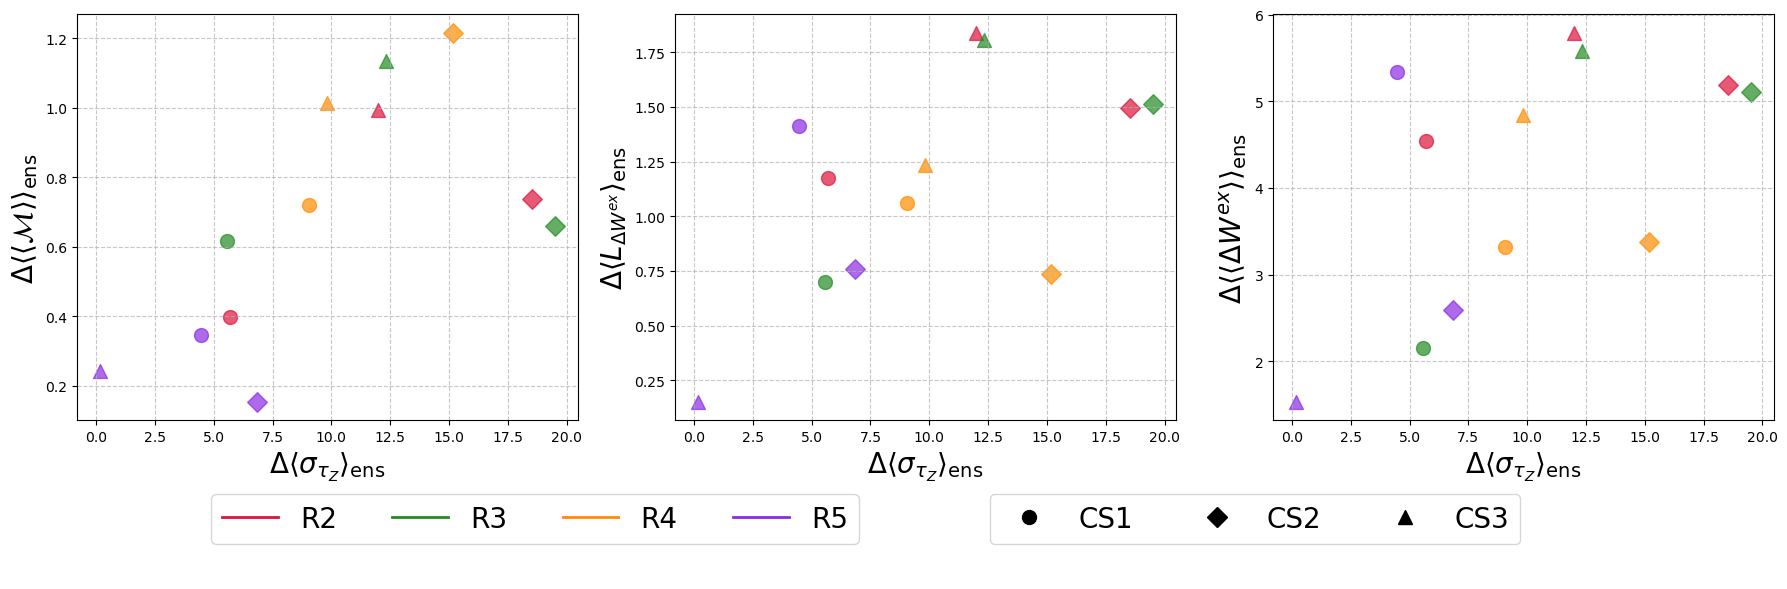

In [56]:
# Define the columns for the 4 plots
x_columns = ['tz_std','tz_std' ,'tz_std']
y_columns = [ "MI_mean",'DeltaW_persist_stat','DeltaW_mean']
y_titles=[r'$\Delta \langle\langle \mathcal{M}\rangle\rangle_{\rm ens}$',r'$\Delta\langle L_{\Delta W^{ex}}\rangle_{\rm ens}$',r'$\Delta\langle \langle \Delta W^{ex}\rangle\rangle_{\rm ens}$']
x_titles=[r'$\Delta\langle \sigma_{\tau_Z}\rangle_{\rm ens}$',r'$\Delta\langle \sigma_{\tau_Z}\rangle_{\rm ens}$',r'$\Delta\langle \sigma_{\tau_Z}\rangle_{\rm ens}$']
plot_titles = [
    'DeltaW_persist_stat vs MI_std', 
    'DeltaW_persist_stat vs tz_std ',
    'MI vs tz std'
]
fig, axes = plot_multiple_scatter_plots(
    df_therm_12Q,
    df_inhomov1_12Q, 
    df_inhomov2_12Q, 
    x_cols=x_columns,
    y_cols=y_columns,
    x_titles=x_titles,
    y_titles=y_titles,
    titles=plot_titles,
    figsize=(18, 6),
    configs_to_plot=['C2']  # Only plot C2
)

# Show the figure
plt.savefig("Delta_W_12_Q_scatter.png",dpi=300,bbox_inches='tight')
plt.show()

/var/folders/58/gxcqk5bd4055b6n0b6yszvlw0000gn/T/ipykernel_64598/200783475.py:249: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


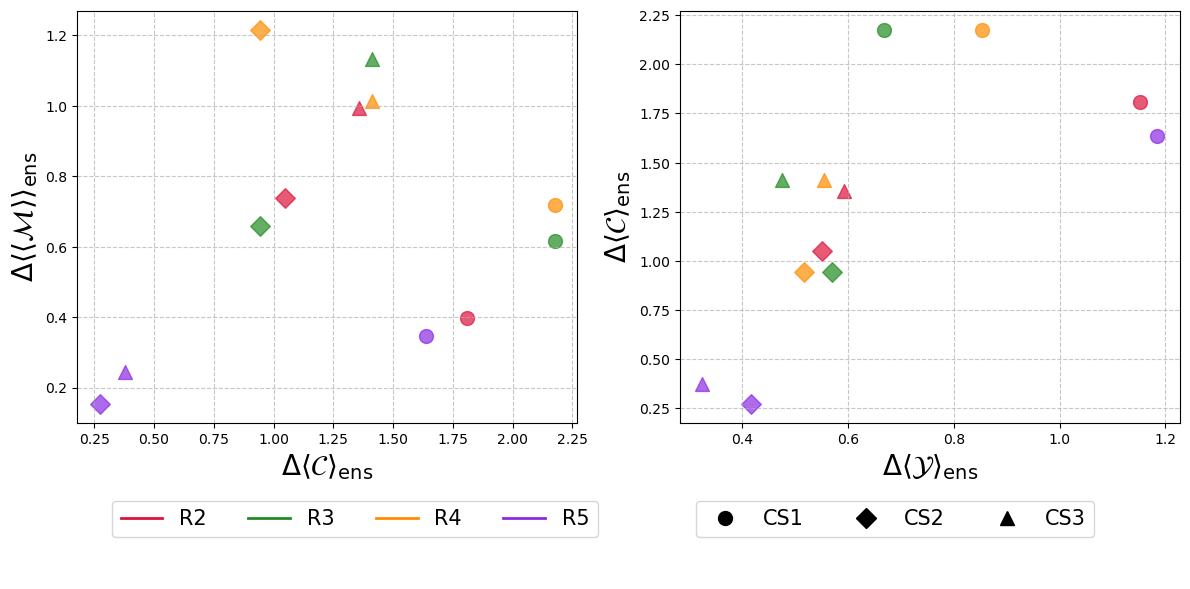

In [57]:
# Define the columns for the 4 plots
x_columns = ['clust_mean', 'disp_mean']
y_columns = ['MI_mean', 'clust_mean']
x_titles=[r'$\Delta\langle \mathcal{C}\rangle_{\rm ens}$',r'$\Delta\langle \mathcal{Y}\rangle_{\rm ens}$']
y_titles=[r'$\Delta\langle\langle \mathcal{M}\rangle\rangle_{\rm ens}$',r'$\Delta\langle \mathcal{C} \rangle_{\rm ens}$']
plot_titles = [
    'DeltaW_persist_stat vs MI_mean', 
    'DeltaW_persist_stat vs  DeltaW_mean', 
]

fig, axes = plot_multiple_scatter_plots(
    df_therm_12Q,
    df_inhomov1_12Q, 
    df_inhomov2_12Q, 
    x_cols=x_columns,
    y_cols=y_columns,
    x_titles=x_titles,
    y_titles=y_titles,
    titles=plot_titles,
    figsize=(12, 6),
    configs_to_plot=['C2']  # Only plot C2
)
# Show the plots

# Show the legend separately
plt.savefig("Network_MI_12_Q_scatter.png",dpi=300,bbox_inches='tight')
plt.show()

/var/folders/58/gxcqk5bd4055b6n0b6yszvlw0000gn/T/ipykernel_21045/2630017215.py:139: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


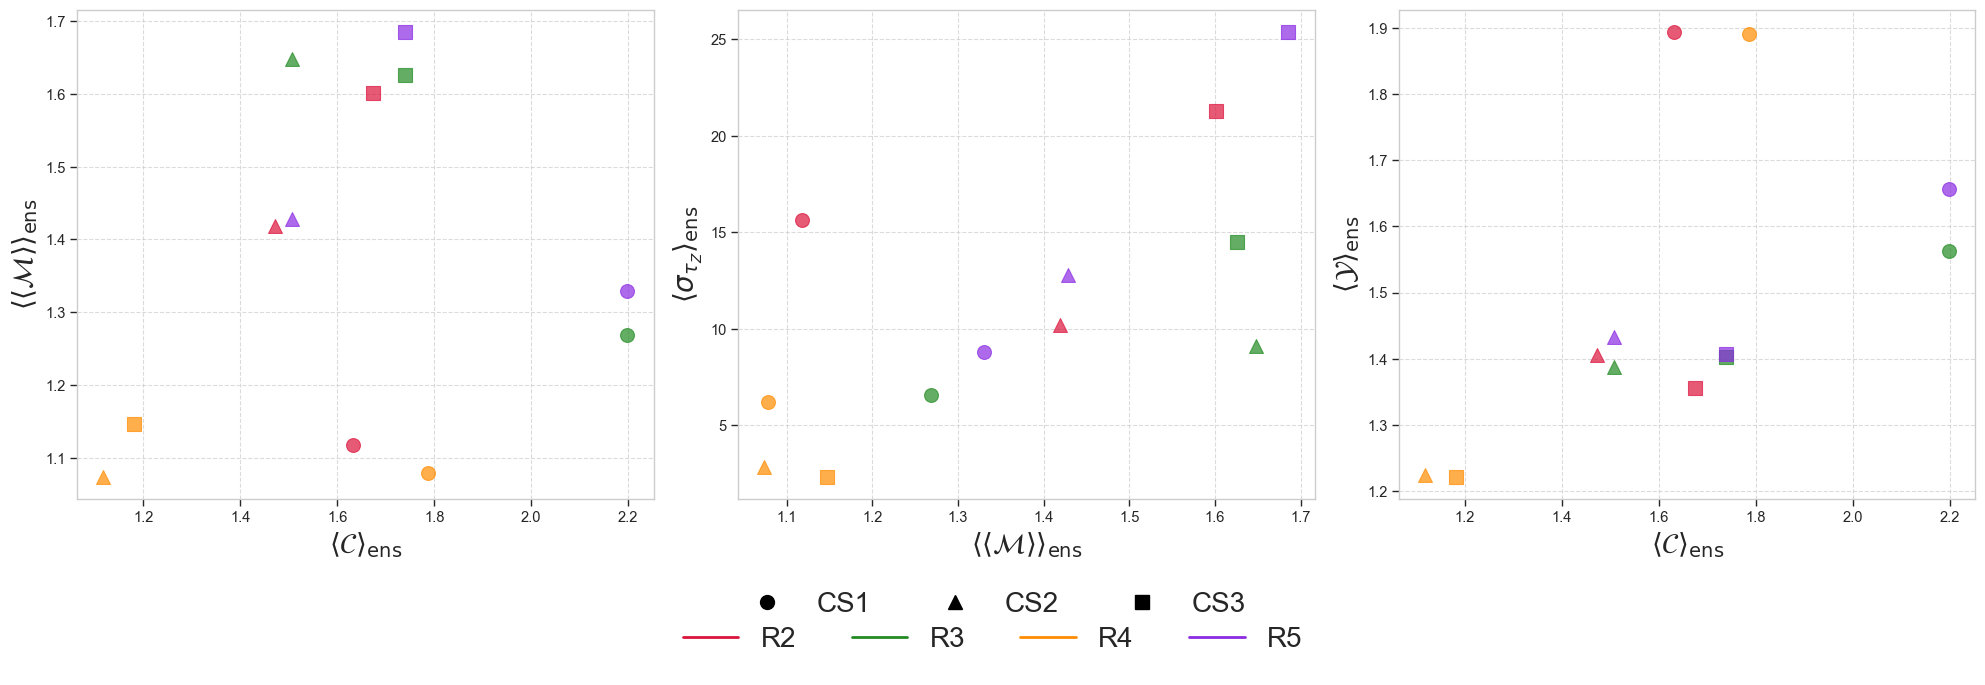

In [193]:
fig, axes = plot_multiple_scatter_plots(
    df_therm_10Q,
    df_inhomov1_10Q, 
    df_inhomov2_10Q, 
    x_cols=x_columns,
    y_cols=y_columns,
    x_titles=x_titles,
    y_titles=y_titles,
    titles=plot_titles,
    figsize=(20, 7),
    configs_to_plot=['C2']  # Only plot C2
)
# Show the plots

# Show the legend separately
plt.savefig("Network_MI_10_Q_scatter.png",dpi=300,bbox_inches='tight')
plt.show()

/var/folders/58/gxcqk5bd4055b6n0b6yszvlw0000gn/T/ipykernel_21045/1625244624.py:141: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


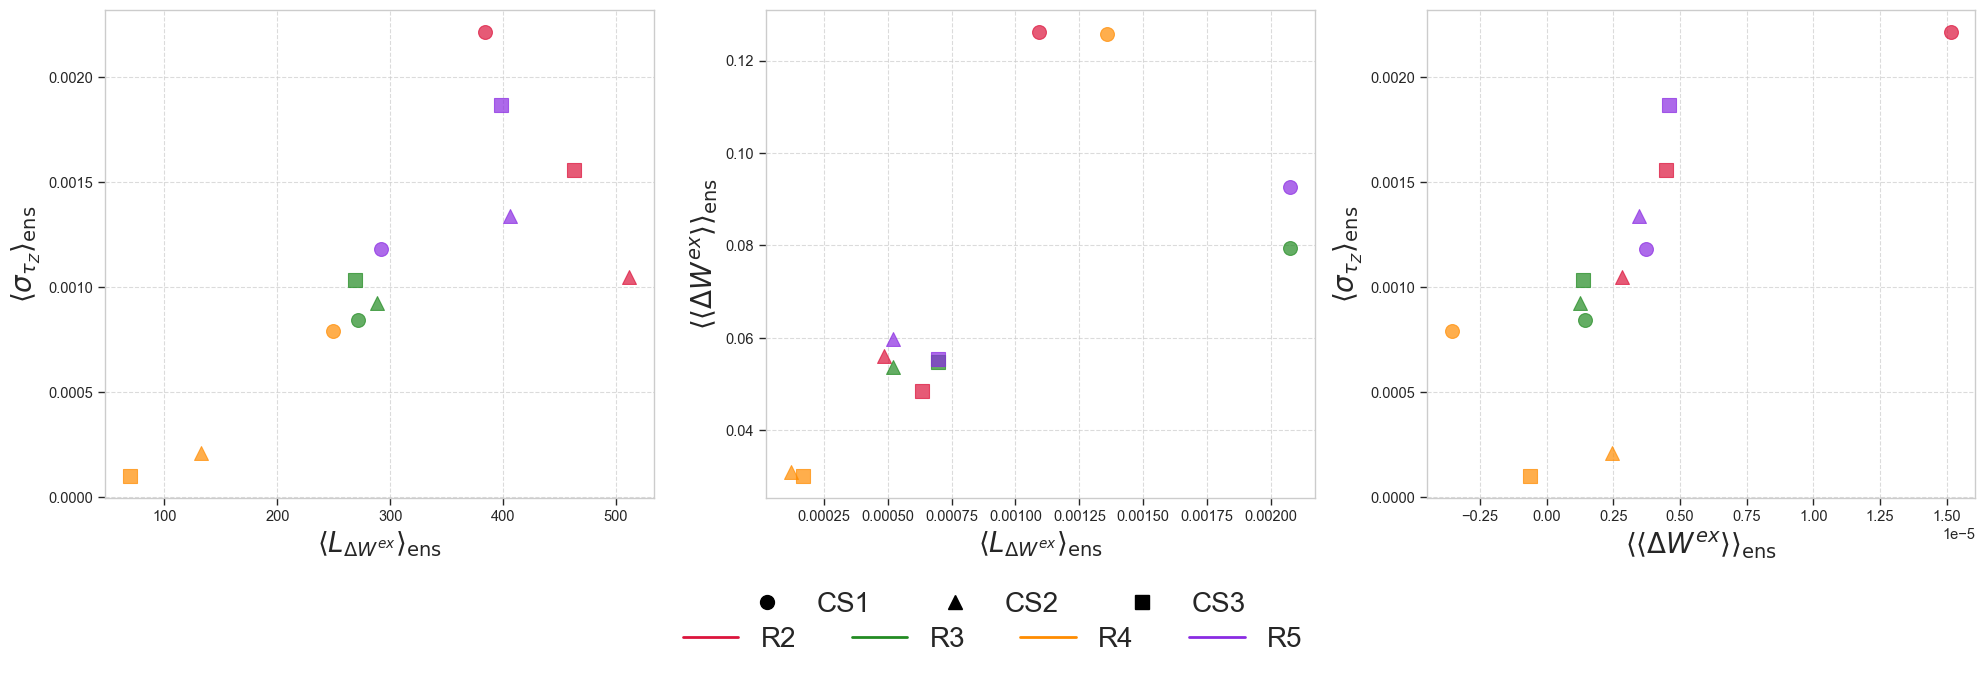

In [72]:
x_columns = [ 'DeltaW_persist_stat', 'clust_mean', 'DeltaW_mean']
y_columns = [ 'tz_std', 'disp_mean', 'tz_std']
x_titles=[r'$\langle L_{\Delta W^{ex}}\rangle_{\rm ens}$',r'$\langle L_{\Delta W^{ex}}\rangle_{\rm ens}$',r'$\langle \langle \Delta W^{ex}\rangle\rangle_{\rm ens}$']
y_titles=[r'$\langle \sigma_{\tau_Z}\rangle_{\rm ens}$',r'$\langle \langle \Delta W^{ex}\rangle \rangle_{\rm ens}$',r'$\langle \sigma_{\tau_Z}\rangle_{\rm ens}$']
plot_titles = [
    'DeltaW_persist_stat vs MI_std', 
    'clust_mean vs  disp_mean', 
    'DeltaW_persist_stat vs tz_std '
]
fig, axes = plot_multiple_scatter_plots(
    df_therm_10Q,
    df_inhomov1_10Q, 
    df_inhomov2_10Q, 
    x_cols=x_columns,
    y_cols=y_columns,
    x_titles=x_titles,
    y_titles=y_titles,
    titles=plot_titles,
    figsize=(20, 7),
    configs_to_plot=['C2']  # Only plot C2
)

# Show the figure
plt.savefig("Delta_W_10_Q_scatter.png",dpi=300,bbox_inches='tight')
plt.show()

In [104]:
df_inhomov2_12Q["tz_std"].values

array([2.05077454e-04, 5.02693627e-05, 2.66680789e-03, 2.00747350e-03,
       2.38925000e-04, 2.75789783e-04, 2.73286234e-03, 2.93149021e-03,
       2.22166444e-03, 1.30795524e-04])

In [208]:
df_therm_12Q

,runtype_name,tz_mean,tz_std,MI_mean,MI_std,disp_mean,disp_std,clust_mean,clust_std,DeltaW_mean,DeltaW_std,DeltaW_persist_stat,DeltaW_persist_std,block
0,R1Q8C2ICtherm,0.03242,0.000167,0.067912,0.005795,0.123111,0.009782,0.000541,0.000090,0.000878,0.000121,309.86,54.654006,IC therm
1,R1Q8C4ICtherm,0.03242,0.000076,0.050855,0.001378,0.119984,0.009096,0.000422,0.000036,0.000330,0.000029,431.01,29.133656,IC therm
2,R2Q8C2ICtherm,0.03242,0.001116,0.094955,0.030705,0.264804,0.049717,0.001520,0.001076,0.004867,0.002513,674.03,301.627898,IC therm
3,R2Q8C4ICtherm,0.03242,0.000215,0.049027,0.003404,0.209272,0.049643,0.000491,0.000138,0.002921,0.000438,323.72,256.779286,IC therm
4,R5Q8C2ICtherm,0.03242,0.000915,0.091484,0.029517,0.268929,0.040096,0.001426,0.000770,0.005565,0.002391,747.01,269.157667,IC therm
5,R5Q8C4ICtherm,0.03242,0.000197,0.050512,0.002995,0.268929,0.040096,0.000505,0.000183,0.003723,0.000382,447.03,224.536209,IC therm
6,R4Q8C2ICtherm,0.03242,0.001100,0.109802,0.030416,0.205200,0.032817,0.001718,0.000854,0.002764,0.001754,527.10,261.259086,IC therm
7,R43Q8C4ICtherm,0.03242,0.000178,0.051612,0.003663,0.166985,0.034783,0.000625,0.000209,0.000635,0.000171,344.75,100.330292,IC therm
8,R4Q8C2ICtherm,0.03242,0.001680,0.116770,0.029048,0.228065,0.050302,0.001718,0.000808,0.003795,0.002900,638.59,273.791457,IC therm
9,R4Q8C4ICtherm,0.03242,0.000122,0.052146,0.006381,0.118978,0.018444,0.000625,0.000153,0.003795,0.002900,330.97,50.673949,IC therm


In [171]:
tz_therm_12_Q_c2=[1.67208866e-04, 1.11649257e-03, 
       1.10033684e-03,1.67972220e-03, 9.14540580e-04]
tz_v1_12_Q_c2=[1.14851623e-04, 2.24477745e-03, 
        2.35585984e-03,1.85572493e-03,9.01387811e-04,]
tz_v2_12_Q_c2=[2.05077454e-04,2.66680789e-03,2.73286234e-03,2.22166444e-03,2.38925000e-04]
tz_pure_12_Q_c2=[0.000875,0.004291,0.002077,0.002749,0.001454]


tz_therm_12_Q_c2=[0.01106, 0.02223, 
       0.01773,0.02082, 0.02317]
tz_v1_12_Q_c2=[0.00936,0.01502,0.01403,0.01705,0.01094]
tz_v2_12_Q_c2=[0.00916,0.01580,0.01582,0.01612,0.0113]
tz_pure_12_Q_c2=[0.06369,0.08601,0.06422,0.06406,0.07350]
tzs=[tz_therm_12_Q_c2,tz_v1_12_Q_c2,tz_v2_12_Q_c2,tz_pure_12_Q_c2]

/var/folders/58/gxcqk5bd4055b6n0b6yszvlw0000gn/T/ipykernel_21045/1576606564.py:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


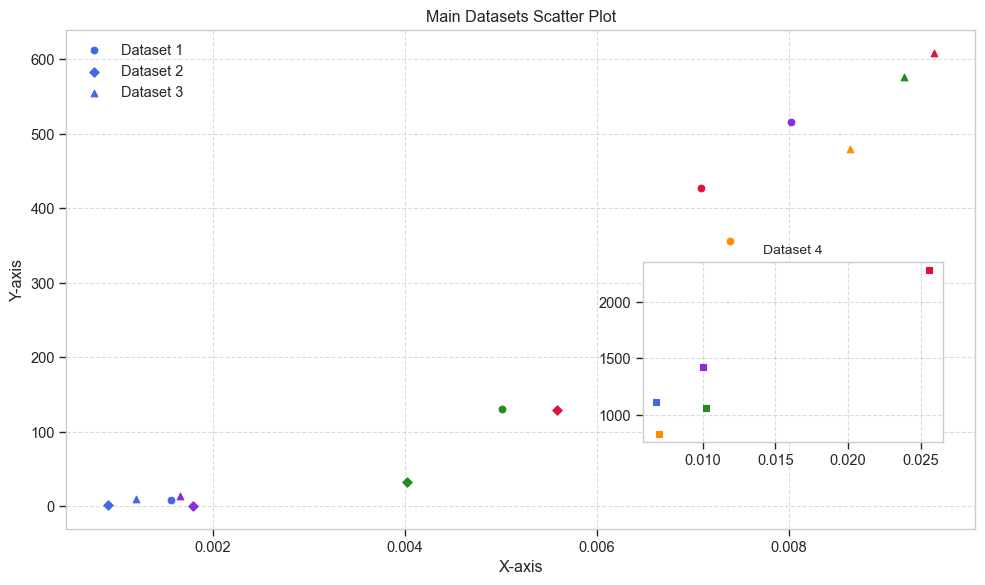

In [175]:
tz_therm_12_Q_c2=[0.0015642453954382352,0.007086614662335837,0.005005406961838861,0.007380572735962032,0.008021247179770638]

tz_v1_12_Q_c2=[0.0009049638852627059,0.0055839358223774725,0.004019546271044754,0.006967552762634482,0.0017907718077853371]

tz_v2_12_Q_c2=[0.0012001070395410208,0.009509279126187048,0.009193107998254367,0.008636464328270298,0.0016532682883436006]

tz_pure_12_Q_c2=[0.006792170332514374,
0.025584281094864835,
0.010232030088954912,
0.0069569606094731125,
0.010025454295612312]
tzs=[tz_therm_12_Q_c2,tz_v1_12_Q_c2,tz_v2_12_Q_c2,tz_pure_12_Q_c2]
NCP_th=[np.int64(8), np.int64(427), np.int64(130), np.int64(356), np.int64(516)]
NCP_v1=[np.int64(1), np.int64(129), np.int64(33), np.int64(289), np.int64(0)]
NCP_v2=[np.int64(10), np.int64(609), np.int64(576), np.int64(479), np.int64(14)]
NCP_pure=[np.int64(1110), np.int64(2280), np.int64(1059), np.int64(827), np.int64(1423)]
NCPs=[NCP_th,NCP_v1,NCP_v2,NCP_pure]


fig, ax = plt.figure(figsize=(10, 6)), plt.subplot(111)

# Color palette for each point within a dataset
colors = ['#4169E1', '#DC143C', '#228B22', '#FF8C00', '#8A2BE2']
markers = ['o', 'D', '^', 's']
labels = ['Dataset 1', 'Dataset 2', 'Dataset 3', 'Dataset 4']

# Plot datasets 0, 1, 2 on the main plot
for i in range(3):  # Only the first 3 datasets for main plot
    for j in range(5):  # For each point in the dataset
        if j == 0:  # Only add label for the first point of each dataset
            ax.scatter(tzs[i][j], NCPs[i][j], color=colors[j], marker=markers[i], label=labels[i])
        else:
            ax.scatter(tzs[i][j], NCPs[i][j], color=colors[j], marker=markers[i])

# Add labels and title to main plot
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Main Datasets Scatter Plot')
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(loc='upper left')

# Create the inset axes
axins = fig.add_axes([0.65, 0.25, 0.3, 0.3])  # [left, bottom, width, height]

# Plot dataset 3 on the inset plot
for j in range(5):
    axins.scatter(tzs[3][j], NCPs[3][j], color=colors[j], marker=markers[3])

# Add title to inset plot
axins.set_title('Dataset 4', fontsize=10)
axins.grid(True, linestyle='--', alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

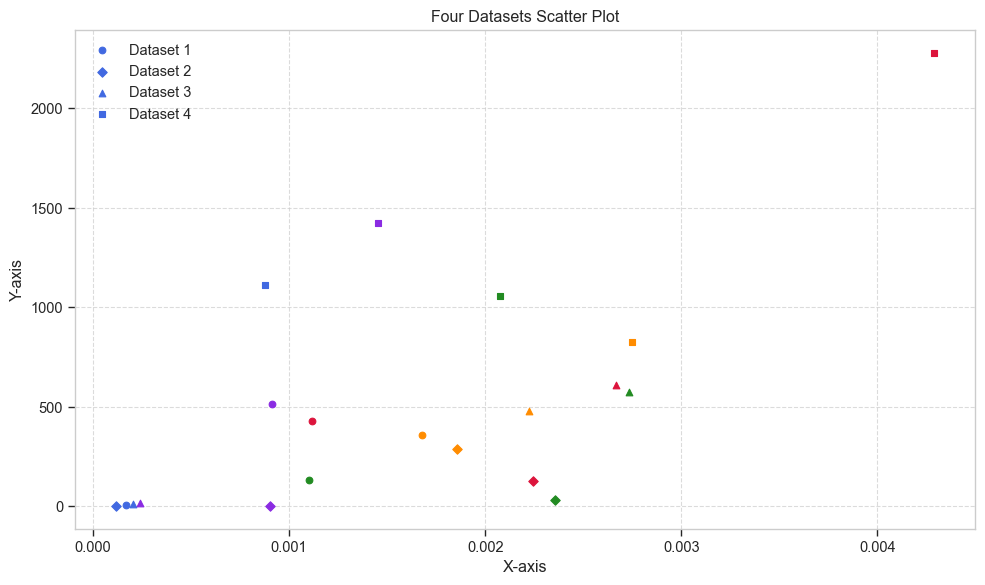

In [123]:
plt.figure(figsize=(10, 6))

# Color palette for each point within a dataset
colors = ['#4169E1', '#DC143C', '#228B22', '#FF8C00', '#8A2BE2']
markers = ['o', 'D', '^', 's']
labels = ['Dataset 1', 'Dataset 2', 'Dataset 3', 'Dataset 4']

# Plot each dataset with different colors for each point
for i in range(4):  # For each dataset
    for j in range(5):  # For each point in the dataset
        if j == 0:  # Only add label for the first point of each dataset
            plt.scatter(tzs[i][j], NCPs[i][j], color=colors[j], marker=markers[i], label=labels[i])
        else:
            plt.scatter(tzs[i][j], NCPs[i][j], color=colors[j], marker=markers[i])

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Four Datasets Scatter Plot')

# Add a legend
plt.legend()

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

/var/folders/58/gxcqk5bd4055b6n0b6yszvlw0000gn/T/ipykernel_21045/487315052.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


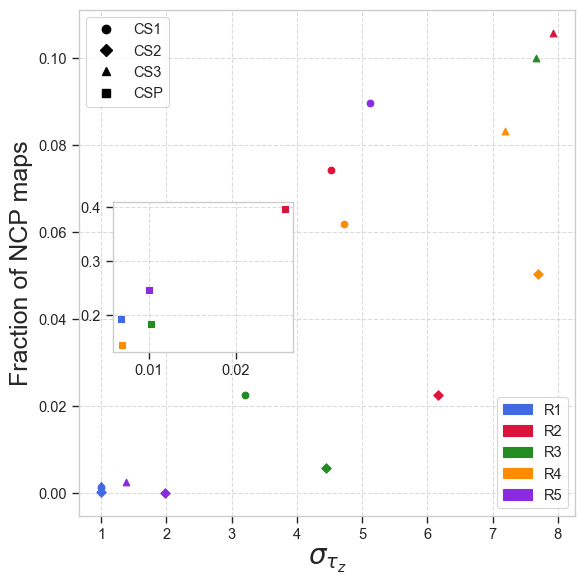

In [176]:
scaled_NCPs = []
for dataset in NCPs:
    scaled_dataset = [y / (479 * 12) for y in dataset]
    scaled_NCPs.append(scaled_dataset)

# Create the main figure and axis
fig, ax = plt.figure(figsize=(6, 6)), plt.subplot(111)

# Color palette for each point within a dataset
colors = ['#4169E1', '#DC143C', '#228B22', '#FF8C00', '#8A2BE2']
color_markers = ["R1", "R2", "R3", "R4", "R5"]
markers = ['o', 'D', '^', 's']
labels = ['CS1', 'CS2', 'CS3', 'CSP']

# Plot datasets 0, 1, 2 on the main plot
for i in range(3):  # Only the first 3 datasets for main plot
    for j in range(5):  # For each point in the dataset
        ax.scatter((tzs[i][j])/tzs[i][0], scaled_NCPs[i][j], color=colors[j], marker=markers[i])

# Create the inset axes
axins = fig.add_axes([0.2, 0.4, 0.3, 0.25])  # [left, bottom, width, height]

# Plot dataset 3 on the inset plot
for j in range(5):
    axins.scatter(tzs[3][j], scaled_NCPs[3][j], color=colors[j], marker=markers[3])

# Add labels to main plot
ax.set_xlabel(r'$\sigma_{\tau_z}$', fontsize=20)
ax.set_ylabel('Fraction of NCP maps', fontsize=18)
ax.grid(True, linestyle='--', alpha=0.7)

# Add grid to inset plot
axins.grid(True, linestyle='--', alpha=0.7)

# Create legend handles for markers (datasets)
marker_handles = []
for i in range(4):
    handle = mlines.Line2D([], [], color='black', marker=markers[i], 
                          linestyle='None', markersize=6, label=labels[i])
    marker_handles.append(handle)

# Create legend handles for colors (R values)
color_handles = []
for i in range(5):
    handle = mpatches.Patch(color=colors[i], label=color_markers[i])
    color_handles.append(handle)

# Add two separate legends
# First legend for markers (datasets)
marker_legend = ax.legend(handles=marker_handles, loc='upper left', 
                         title='', frameon=True)
# Add the first legend manually to the axes
ax.add_artist(marker_legend)

# Second legend for colors (R values)
ax.legend(handles=color_handles, loc='lower right', title='', frameon=True)

# Tight layout for better spacing
plt.savefig("Fraction_of_NCP.png",bbox_inches="tight")
plt.tight_layout()

# Show the plot
plt.show()